In [1]:
import sklearn 
import xgboost as xgb
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
x_test=pd.read_csv("test.csv")
y_test=pd.read_csv("sampleSubmission.csv")

In [3]:
train.drop(columns=["PassengerId"], axis=1, inplace=True)
x_test.drop(columns=["PassengerId"], axis=1, inplace=True)
y_test.drop(columns=["PassengerId"], axis=1, inplace=True)

In [4]:
y_train=train.iloc[:, 0:1]
x_train=train.iloc[:, 1:]

In [5]:
tmp_train=pd.concat([x_train, y_train], axis=1)
tmp_test=pd.concat([x_test, y_test], axis=1)
dataset=pd.concat([tmp_train, tmp_test])

In [6]:
dataset.drop(columns=["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Sex"]=le.fit_transform(dataset["Sex"])
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
dataset["Fare"].fillna(dataset["Fare"].mean(), inplace=True)

/tmp/ipykernel_4460/1077600949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
/tmp/ipykernel_4460/1077600949.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [8]:
dataset=dataset.dropna(subset=["Embarked"])

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1307 non-null   int64  
 1   Sex       1307 non-null   int64  
 2   Age       1307 non-null   float64
 3   SibSp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Fare      1307 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Survived  1307 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 91.9+ KB


### pre processing:

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Embarked"]=le.fit_transform(dataset["Embarked"])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1307 non-null   int64  
 1   Sex       1307 non-null   int64  
 2   Age       1307 non-null   float64
 3   SibSp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Fare      1307 non-null   float64
 6   Embarked  1307 non-null   int64  
 7   Survived  1307 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 91.9 KB


In [12]:
corr=dataset.corr()

<Axes: >

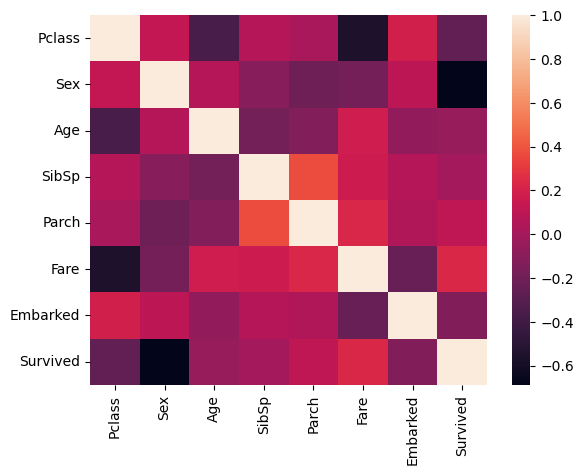

In [13]:
sns.heatmap(corr)

### logistic regression:

In [14]:
from sklearn.model_selection import train_test_split
x=dataset.iloc[:, :-1]
y=dataset.iloc[:, -1:]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=3, test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

/home/rahaan/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rahaan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
ascore=accuracy_score(y_test, y_pred)
ascore

0.8740458015267175

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

/home/rahaan/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [18]:
y_pred=knn.predict(x_test)
ascore=accuracy_score(y_test, y_pred)
ascore

0.7022900763358778

### SVM

In [19]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")
svc.fit(x_train, y_train)

/home/rahaan/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [20]:
y_pred=svc.predict(x_test)
ascore=accuracy_score(y_test, y_pred)
ascore

0.8702290076335878

### decision tree:

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy", random_state=22)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=22)

In [22]:
y_pred=dtc.predict(x_test)
ascore=accuracy_score(y_test, y_pred)
ascore

0.8358778625954199

### Random Forest:

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="entropy", random_state=23)
rfc.fit(x_train, y_train)


/home/rahaan/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', random_state=23)

In [24]:
y_pred=rfc.predict(x_test)
ascore=accuracy_score(y_test, y_pred)
ascore

0.8587786259541985

### XGB:

In [25]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
y_pred=model.predict(x_test)
ascore=accuracy_score(y_test, y_pred)
ascore

0.8587786259541985